<table align="center">
   <td align="center"><a target="_blank" href="https://colab.research.google.com/github.com/nehayadav7295/Book-Recommendation-System/Book_Recommendation_System.ipynb">
<img src="https://github.com/ds5110/summer-2021/raw/master/colab.png"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
</table>

# Book Recommendation System

In [ ]:
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt
import random
from PIL import Image
import requests
from io import BytesIO
pd.set_option('display.max_colwidth', None)
import warnings
warnings.filterwarnings("ignore")

## Ratings Dataset

In [ ]:
##Importing the Ratings dataset.
Ratings = pd.read_csv(r'/Users/simrankodwani/Desktop/Ratings.csv',delimiter=';')
Ratings.head(5)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
##Checking for NA values in the dataset.
Ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

#### No NA(missing values) in the Ratings Dataset!

In [ ]:
##Checking the data types of columns to make sure there are no incorrect entries in the columns.
Ratings.dtypes

User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object

#### The data types justify the variables and hence look okay. 

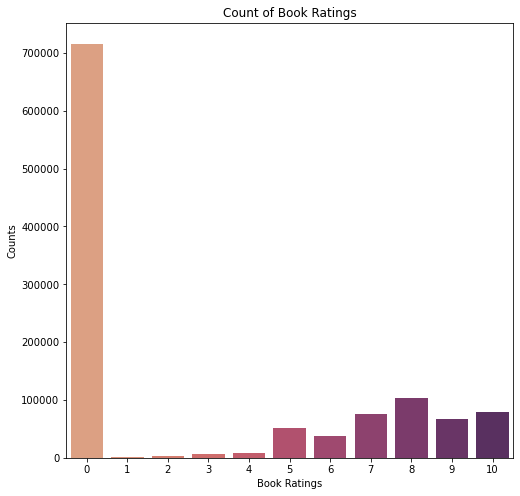

In [ ]:
##Visulaizing the count of Book-Ratings.
fig, ax = plt.subplots(figsize =(8,8))
a = sns.countplot(data=Ratings, x='Book-Rating', palette='flare')
a.set(xlabel='Book Ratings', ylabel='Counts', title='Count of Book Ratings');

#### The bar plot shows that the majority ratings in the dataset are 0. 

#### Lets name these ratings as implicit ratings and non-zero ratings as explicit ratings.

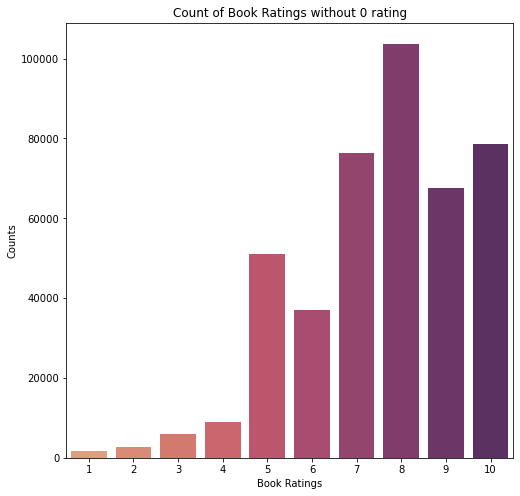

In [ ]:
##Dropping the rows where the Book-Ratings is 0.
Ratings = Ratings[Ratings['Book-Rating'] != 0]
fig, ax = plt.subplots(figsize =(8,8))
b = sns.countplot(data=Ratings, x='Book-Rating', palette='flare')
b.set(xlabel='Book Ratings', ylabel='Counts', title='Count of Book Ratings without 0 rating');

#### The bar plot shows that 8 is the most common explicit rating in the dataset.


In [ ]:
##Number of unique users and unique books.
U_users = len(pd.unique(Ratings['User-ID']))
U_books = len(pd.unique(Ratings['ISBN']))
print('\033[1m'+'Number of Unique Users in the Ratings dataset:', U_users)
print('\033[1m'+'Number of Unique Books in the Ratings dataset:', U_books)

Number of Unique Users in the Ratings dataset: 77805
Number of Unique Books in the Ratings dataset: 185973


## Books Dataset

In [ ]:
##Importing the Books dataset.
Books = pd.read_csv(r"/Users/simrankodwani/Desktop/Books.csv",delimiter=";")
Books.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg


In [ ]:
##Checking for NA values in the dataset.
Books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

In [ ]:
##Inspecting rows with NA values.
null_data = Books[Books.isnull().any(axis=1)]
null_data

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128896,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.LZZZZZZZ.jpg
129043,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.LZZZZZZZ.jpg
187700,9627982032,The Credit Suisse Guide to Managing Your Personal Wealth,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/9627982032.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/9627982032.01.LZZZZZZZ.jpg


#### The books "Tyrant Moon" and "Finders Keepers" have a missing Publisher. 

#### The book "The Credit Suisse Guide to Managing Your Personal Wealth" has a missing Book-Author.

In [ ]:
##Checking the dataset to see if the book "Finders Keepers" has a publisher in any other row.
check = Books[Books['Book-Title'] == 'Finders Keepers']
check

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
10800,082177364X,Finders Keepers,Fern Michaels,2002,Zebra Books,http://images.amazon.com/images/P/082177364X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/082177364X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/082177364X.01.LZZZZZZZ.jpg
42020,0070465037,Finders Keepers,Barbara Nickolae,1989,McGraw-Hill Companies,http://images.amazon.com/images/P/0070465037.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0070465037.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0070465037.01.LZZZZZZZ.jpg
58267,0688118461,Finders Keepers,Emily Rodda,1993,Harpercollins Juvenile Books,http://images.amazon.com/images/P/0688118461.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0688118461.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0688118461.01.LZZZZZZZ.jpg
66681,1575663236,Finders Keepers,Fern Michaels,1998,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575663236.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1575663236.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1575663236.01.LZZZZZZZ.jpg
129043,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.LZZZZZZZ.jpg
134315,0156309505,Finders Keepers,Will,1989,Voyager Books,http://images.amazon.com/images/P/0156309505.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0156309505.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0156309505.01.LZZZZZZZ.jpg
173482,0973146907,Finders Keepers,Sean M. Costello,2002,Red Tower Publications,http://images.amazon.com/images/P/0973146907.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0973146907.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0973146907.01.LZZZZZZZ.jpg
195896,0061083909,Finders Keepers,Sharon Sala,2003,HarperTorch,http://images.amazon.com/images/P/0061083909.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0061083909.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0061083909.01.LZZZZZZZ.jpg
211886,0373261160,Finders Keepers,Elizabeth Travis,1993,Worldwide Library,http://images.amazon.com/images/P/0373261160.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0373261160.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0373261160.01.LZZZZZZZ.jpg


#### The book "Finders Keepers" has various ISBN values and each one has a different Author and Publisher.

#### Does that make sense?



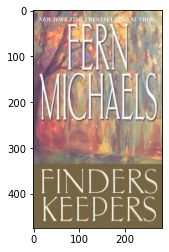

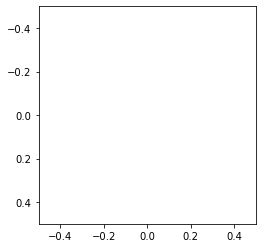

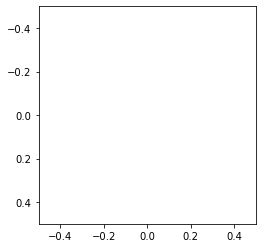

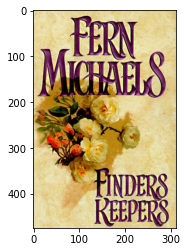

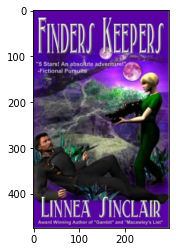

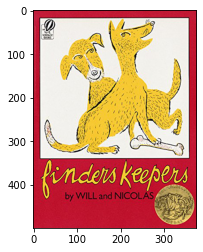

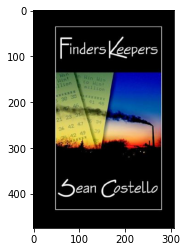

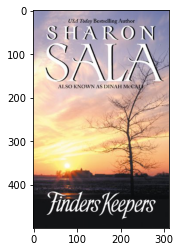

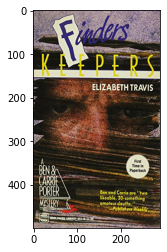

In [ ]:
##Checking if these are the same books or different books written under the same Book-Title.
for i in check['Image-URL-L']:
    response = requests.get(i)
    img = Image.open(BytesIO(response.content))
    plt.figure();
    plt.imshow(img);

#### These books look like they are different books written by different authors with the same Book-Title.

#### There is no way to find the missing Publisher value for the row with NA value whose Book-Title is "Finders Keepers", so dropping the row from the dataset.

In [ ]:
##Dropping the row.
i = Books[((Books['Book-Title'] == 'Finders Keepers') & (Books['Publisher'].isnull()))].index
Books = Books.drop(i)

In [ ]:
##Checking the dataset to see if the book "Tyrant Moon" has a publisher in any other row.
check1 = Books[Books['Book-Title'] == 'Tyrant Moon']
check1

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128896,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.LZZZZZZZ.jpg


#### Since there is no other row with the same book and the publisher can not be determined, the row with the missing value will be dropped.

In [ ]:
##Dropping the row.
z = Books[((Books['Book-Title'] == 'Tyrant Moon'))].index
Books = Books.drop(z)

In [ ]:
##Checking for the book with a missing author.
check2 = Books[Books['Book-Title'] == 'The Credit Suisse Guide to Managing Your Personal Wealth']
check2

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
187700,9627982032,The Credit Suisse Guide to Managing Your Personal Wealth,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/9627982032.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/9627982032.01.LZZZZZZZ.jpg


#### There is only one book with the title "The Credit Suisse Guide to Managing Your Personal Wealth" and the book author is not known. Therefore, the row will be dropped.

In [ ]:
j = Books[((Books['Book-Title'] == 'The Credit Suisse Guide to Managing Your Personal Wealth'))].index
Books = Books.drop(j)

In [ ]:
##Checking the Year-Of-Publication column.
Books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984,    0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, 2012, 2006, 1909, 2008, 1378,
       1919, 1922, 1897, 2024, 1376, 2037])

In [ ]:
## Dropping NA values from Year of Publication
Books['Year-Of-Publication'] = Books['Year-Of-Publication'].astype(str)
Books['Year-Of-Publication'] = Books['Year-Of-Publication'].replace(['0','1378','2030','2037','2050','2024','1376'], np.nan)
Books = Books.dropna(subset=['Year-Of-Publication'])
Books['Year-Of-Publication'] = pd.to_numeric(Books['Year-Of-Publication'],downcast='integer')

In [ ]:
Books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 1968, 1961, 1958, 1974, 1976,
       1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960, 1966,
       1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954, 1950,
       1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011, 1925,
       1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 1911, 1904,
       1949, 1932, 1928, 1929, 1927, 1931, 1914, 1934, 1910, 1933, 1902,
       1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901, 2010, 1908, 1906,
       1935, 1806, 2021, 2012, 2006, 1909, 2008, 1919, 1922, 1897],
      dtype=int16)

In [ ]:
##Checking for missing values again.
Books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

#### No missing values in the dataset now!

In [ ]:
##Checking the datatype of columns to make sure there are no errors.
Books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication     int16
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

#### The data types justify the variables and hence look okay. 

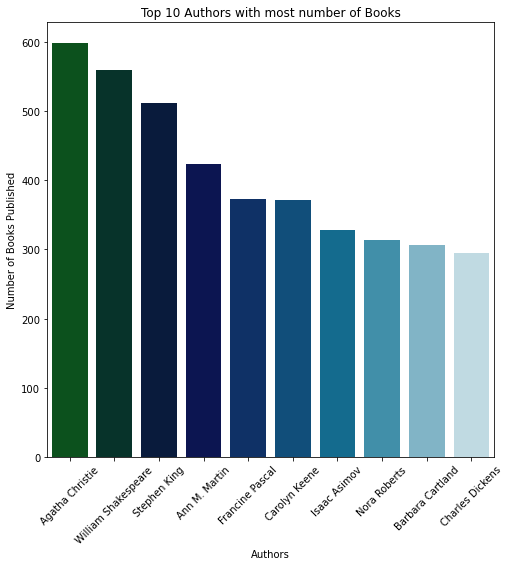

In [ ]:
##Counting Books written by each author.
f = Books.groupby(['Book-Author'])['Book-Title'].count().sort_values(ascending=False).head(10)
f = f.reset_index()

##Plotting the Top 10 Authors with most number of Books.
fig, ax = plt.subplots(figsize =(8,8))
c = sns.barplot(data=f, y='Book-Title', x='Book-Author', palette='ocean')
c.set(xlabel='Authors', ylabel='Number of Books Published', title='Top 10 Authors with most number of Books')
plt.xticks(rotation=45);

#### Agatha Christie has written the most number of books followed by William Shakespeare.

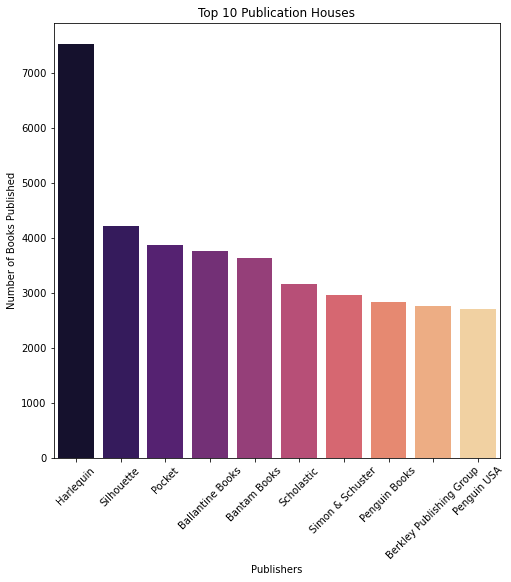

In [ ]:
##Counting Books published by each publisher.
f = Books.groupby(['Publisher'])['Book-Title'].count().sort_values(ascending=False).head(10)
f = f.reset_index()

##Plotting the Top 10 Authors with most number of Books.
fig, ax = plt.subplots(figsize =(8,8))
c = sns.barplot(data=f, y='Book-Title', x='Publisher', palette='magma')
c.set(xlabel='Publishers', ylabel='Number of Books Published', title='Top 10 Publication Houses')
plt.xticks(rotation=45);

#### 'Harlequin' has published the most number of books.

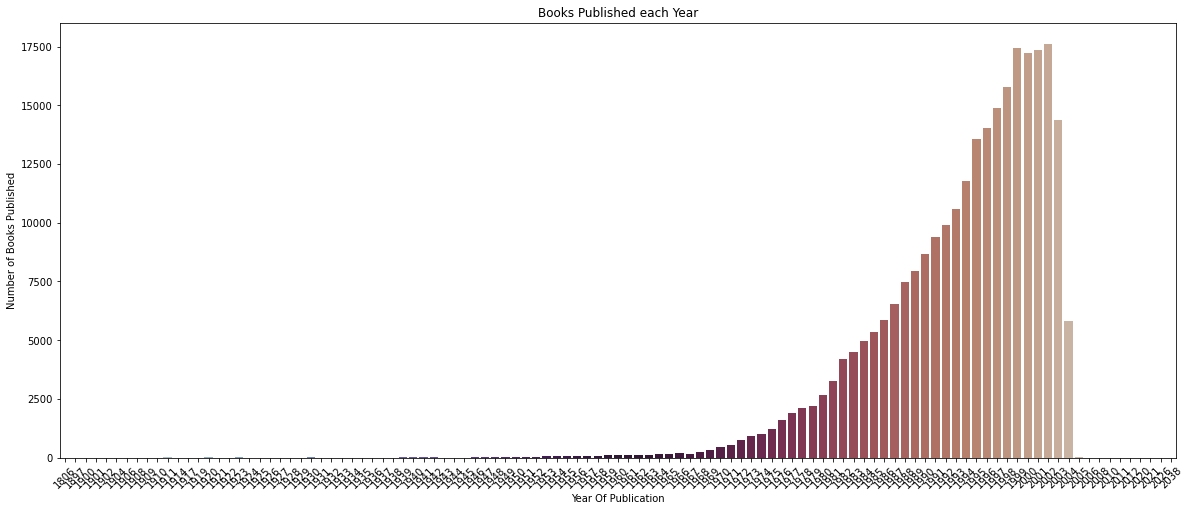

In [ ]:
##Counting Books published by each year.
f = Books.groupby(['Year-Of-Publication'])['Book-Title'].count().sort_values(ascending=False)
f = f.reset_index()

##Plotting the Top 10 Authors with most number of Books.
fig, ax = plt.subplots(figsize =(20,8))
c = sns.barplot(data=f, y='Book-Title', x='Year-Of-Publication', palette='twilight')
c.set(xlabel='Year Of Publication', ylabel='Number of Books Published', title='Books Published each Year')
plt.xticks(rotation=45);

## Users Dataset

In [ ]:
##Importing the Users dataset.
Users = pd.read_csv(r"/Users/simrankodwani/Desktop/Users.csv",delimiter=";")
Users.head(5)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
##Checking for missing values.
Users.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

#### There are a lot of missing values in the 'Age' column

In [ ]:
# Separating location into City and Country
Users['Country'] = Users['Location'].str.split(',').apply(lambda x: x[-1])
Users['City'] = Users['Location'].str.split(',').apply(lambda x: x[0])  
Users.head(5)

,User-ID,Location,Age,Country,City
0,1,"nyc, new york, usa",NaN,usa,nyc
1,2,"stockton, california, usa",18.0,usa,stockton
2,3,"moscow, yukon territory, russia",NaN,russia,moscow
3,4,"porto, v.n.gaia, portugal",17.0,portugal,porto
4,5,"farnborough, hants, united kingdom",NaN,united kingdom,farnborough


In [ ]:
##Dropping the location and age column.
Users = Users[['User-ID', 'Country', 'City']]
Users.head(5)

,User-ID,Country,City
0,1,usa,nyc
1,2,usa,stockton
2,3,russia,moscow
3,4,portugal,porto
4,5,united kingdom,farnborough


In [ ]:
##Removing special characters from Country and City column (which also removes empty values)
Users = Users.drop(Users[Users.Country.str.contains(r'[@#&$%+-/*�>'']')].index)
Users = Users.drop(Users[Users.City.str.contains(r'[@#&$%+-/*�>'']')].index)

##Formatting the Country column
Users['Country'] = Users['Country'].replace('"',np.nan)
Users['Country'] = Users['Country'].replace("''",np.nan)
Users['Country'] = Users['Country'].replace(r'^\s*$', np.nan, regex=True)
Users['Country'] = Users['Country'].replace(['everywhere and anywhere','otherhile','the','universe','tdzimi','quit','other','k1other7b1','lkjlj','we`re global!','space'], 'unknown', regex=True)
Users['Country'] = Users['Country'].replace(['united states','united state','ysa','united staes','united sates'], 'usa', regex=True)

In [ ]:
Users.dtypes

User-ID     int64
Country    object
City       object
dtype: object

In [ ]:
##Checking for missing values.
Users.isna().sum()

User-ID       0
Country    4381
City          0
dtype: int64

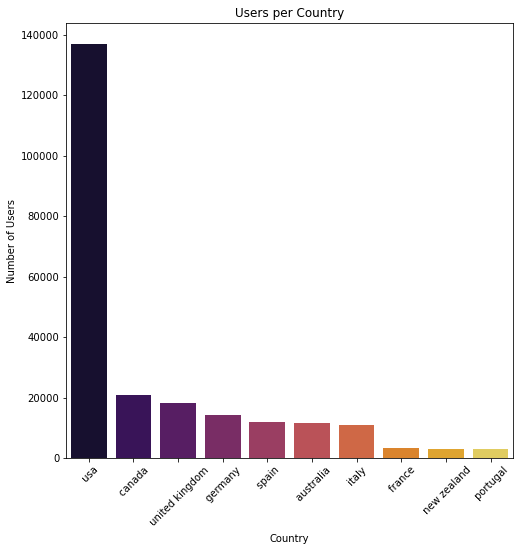

In [ ]:
##Counting Users per country.
f = Users.groupby(['Country'])['User-ID'].count().sort_values(ascending=False).head(10)
f = f.reset_index()

##Plotting the Top 10 Authors with most number of Books.
fig, ax = plt.subplots(figsize =(8,8))
c = sns.barplot(data=f, x='Country', y='User-ID', palette='inferno')
c.set(xlabel='Country', ylabel='Number of Users', title='Users per Country')
plt.xticks(rotation=45);

#### Most of the users are from the US.

## Summary Dataset

In [ ]:
##Importing the Summary Dataset.
Summary = pd.read_csv(r"/Users/simrankodwani/Desktop/Summary.csv")
Summary.head(5)

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
0,0,2,"stockton, california, usa",18.0000,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg,"Provides an introduction to classical myths placing the addressed\ntopics within their historical context, discussion of archaeological\nevidence as support for mythical events, and how these themes have\nbeen portrayed in literature, art, ...",en,['Social Science'],stockton,california,usa
1,1,8,"timmins, ontario, canada",34.7439,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,"In a small town in Canada, Clara Callan reluctantly takes leave of her\nsister, Nora, who is bound for New York.",en,['Actresses'],timmins,ontario,canada
2,2,11400,"ottawa, ontario, canada",49.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,"In a small town in Canada, Clara Callan reluctantly takes leave of her\nsister, Nora, who is bound for New York.",en,['Actresses'],ottawa,ontario,canada
3,3,11676,"n/a, n/a, n/a",34.7439,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,"In a small town in Canada, Clara Callan reluctantly takes leave of her\nsister, Nora, who is bound for New York.",en,['Actresses'],NaN,NaN,NaN
4,4,41385,"sudbury, ontario, canada",34.7439,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,"In a small town in Canada, Clara Callan reluctantly takes leave of her\nsister, Nora, who is bound for New York.",en,['Actresses'],sudbury,ontario,canada


In [ ]:
##Dropping columns
Summary = Summary.drop(['Unnamed: 0','location', 'age', 'img_s', 'img_m', 'city', 'state', 'country'], axis=1)
Summary.head(5)

,user_id,isbn,rating,book_title,book_author,year_of_publication,publisher,img_l,Summary,Language,Category
0,2,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg,"Provides an introduction to classical myths placing the addressed\ntopics within their historical context, discussion of archaeological\nevidence as support for mythical events, and how these themes have\nbeen portrayed in literature, art, ...",en,['Social Science']
1,8,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,"In a small town in Canada, Clara Callan reluctantly takes leave of her\nsister, Nora, who is bound for New York.",en,['Actresses']
2,11400,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,"In a small town in Canada, Clara Callan reluctantly takes leave of her\nsister, Nora, who is bound for New York.",en,['Actresses']
3,11676,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,"In a small town in Canada, Clara Callan reluctantly takes leave of her\nsister, Nora, who is bound for New York.",en,['Actresses']
4,41385,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,"In a small town in Canada, Clara Callan reluctantly takes leave of her\nsister, Nora, who is bound for New York.",en,['Actresses']


In [ ]:
##Renaming columns to maintain uniformnity.
Summary = Summary.rename(columns = {'user_id': 'User-ID',
                                    'isbn': 'ISBN',
                                    'rating': 'Book-Rating',
                                    'book_title': 'Book-Title',
                                    'book_author': 'Book-Author',
                                    'year_of_publication': 'Year_Of_Publication',
                                    'publisher': 'Publisher',
                                    'img_l': 'Image-URL-L'})

In [ ]:
# Removing square brackets and quotes from Category column
Summary['Category'] = Summary['Category'].str.strip('[]').astype(str)
Summary['Category'] = Summary['Category'].str.strip("''").astype(str)
Summary

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year_Of_Publication,Publisher,Image-URL-L,Summary,Language,Category
0,2,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg,"Provides an introduction to classical myths placing the addressed\ntopics within their historical context, discussion of archaeological\nevidence as support for mythical events, and how these themes have\nbeen portrayed in literature, art, ...",en,Social Science
1,8,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,"In a small town in Canada, Clara Callan reluctantly takes leave of her\nsister, Nora, who is bound for New York.",en,Actresses
2,11400,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,"In a small town in Canada, Clara Callan reluctantly takes leave of her\nsister, Nora, who is bound for New York.",en,Actresses
3,11676,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,"In a small town in Canada, Clara Callan reluctantly takes leave of her\nsister, Nora, who is bound for New York.",en,Actresses
4,41385,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,"In a small town in Canada, Clara Callan reluctantly takes leave of her\nsister, Nora, who is bound for New York.",en,Actresses
...,...,...,...,...,...,...,...,...,...,...,...
1031170,278851,0743203763,0,As Hogan Said . . . : The 389 Best Things Anyone Said about How to Play Golf,Randy Voorhees,2000.0,Simon & Schuster,http://images.amazon.com/images/P/0743203763.01.LZZZZZZZ.jpg,"Golf lovers will revel in this collection of tips, wisdom, and\nquotations culled from the masters of the game, including Bobby Jones,\nJack Nichlaus, Sam Snead, Tom Watson, and Tiger Woods. 60,000 first\nprinting.",en,Humor
1031171,278851,0767907566,5,All Elevations Unknown: An Adventure in the Heart of Borneo,Sam Lightner,2001.0,Broadway Books,http://images.amazon.com/images/P/0767907566.01.LZZZZZZZ.jpg,"A daring twist on the travel-adventure genre that places the talented\nLightner in the ranks of authors such as Jon Krakauer, Sebastian\nJunger, and Redmond O&#39;Hanlon, All Elevations Unknown is ultimately\nthe remarkable story of two ...",en,Nature
1031172,278851,0884159221,7,Why stop?: A guide to Texas historical roadside markers,Claude Dooley,1985.0,Lone Star Books,http://images.amazon.com/images/P/0884159221.01.LZZZZZZZ.jpg,9,9,9
1031173,278851,0912333022,7,The Are You Being Served? Stories: 'Camping In' and Other Fiascoes,Jeremy Lloyd,1997.0,Kqed Books,http://images.amazon.com/images/P/0912333022.01.LZZZZZZZ.jpg,These hilarious stories by the creator of public television&#39;s\nlongest-running hit series capture the wacky sensibility and off-the-\nwall humor of the British sitcom.,en,Fiction


In [ ]:
##Checking for missing values.
Summary.isna().sum()

User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year_Of_Publication    0
Publisher              0
Image-URL-L            0
Summary                0
Language               0
Category               0
dtype: int64

In [ ]:
Summary.dtypes

User-ID                  int64
ISBN                    object
Book-Rating              int64
Book-Title              object
Book-Author             object
Year_Of_Publication    float64
Publisher               object
Image-URL-L             object
Summary                 object
Language                object
Category                object
dtype: object

In [ ]:
##Filtering out a wrong category.
Summary = Summary[Summary['Category'] != '9']

In [ ]:
Summary = Summary[Summary['Book-Rating'] != 0]

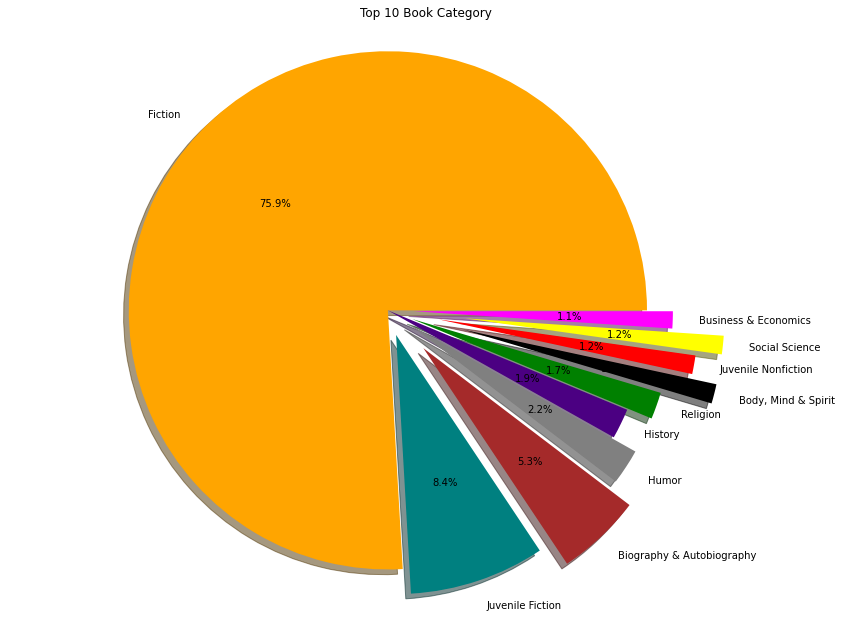

In [ ]:
##Visulaizing different categories.
fig, ax = plt.subplots(figsize =(15, 11))
t = Summary.groupby(['Category'])['ISBN'].count().sort_values(ascending=False).head(10)
t = t.reset_index()

explode = (0.0, 0.1, 0.2, 0.1, 0.0, 0.1,0.3,0.2,0.3,0.1)
colors = ( "orange", "teal", "brown","grey", "indigo", "green","black","red","yellow","magenta")
plt.pie(t['ISBN'], labels=t['Category'], autopct='%1.1f%%', colors=colors, shadow=True, explode=explode)
plt.title('Top 10 Book Category')
plt.axis('equal')
plt.show()

#### The most common type of category is Fiction.

In [ ]:
##Checking the year of publication column.
Summary['Year_Of_Publication'].unique()

array([2001., 1991., 1999., 2000., 2002., 1988., 1994., 2003., 1998.,
       2004., 1997., 1989., 1996., 1993., 1979., 1995., 1992., 1978.,
       1983., 1987., 1981., 1986., 1990., 1982., 1961., 1959., 1946.,
       1985., 1984., 1958., 1968., 1965., 1970., 1971., 1962., 1980.,
       1976., 1974., 1960., 1975., 1954., 1977., 1920., 1973., 1972.,
       1967., 1950., 1966., 1969., 2005., 1953., 1957., 1937., 1956.,
       1930., 1945., 1963., 1936., 1925., 1964., 1955., 1952., 1939.,
       1926., 1938., 1940., 1951., 1932., 1929., 1923., 1949., 1943.,
       1942., 1941., 1947., 2006., 1378., 1928., 1924., 1935., 1911.,
       1944., 1931.])

In [ ]:
Summary['Category'].unique()

array(['Actresses', '1940-1949', 'Medical', ..., 'Deafness',
       'Alternative histories',
       'Authors, Canadian (English) 20th century Biography'], dtype=object)

In [ ]:
##Filtering the wrong Year of Publications
Summary['Year_Of_Publication'] = Summary['Year_Of_Publication'].astype(str)
Summary['Year_Of_Publication'] = Summary['Year_Of_Publication'].replace(['0','1378','2030','2037','2050','2024','1376'], np.nan)

In [ ]:
##Removing punctuations from the summary column.
import string
Summary['Summary'] = Summary['Summary'].str.replace('[{}]'.format(string.punctuation), '')

In [ ]:
##Removing any special characters from the summary column.
Summary['Summary'] = Summary['Summary'].str.replace('\n',' ')
Summary['Summary'] = Summary['Summary'].str.replace('[^\w\s]','')

# Merging all the datasets

In [ ]:
##Merging ratings and books.
table = Ratings.merge(Books, on='ISBN')

In [ ]:
##Merging the merged table with Summary.
df = table.merge(Summary, on=['ISBN', 'User-ID', 'Book-Rating', 'Publisher', 'Book-Author', 'Book-Title'])

In [ ]:
##Dropping columns that wouldn't be needed further.
df = df.drop(['Image-URL-S','Image-URL-M', 'Image-URL-L_x'], axis=1)

In [ ]:
##Renamimg columns to maintain uniformity
df = df.rename(columns = {'Image-URL-L_y': 'Image-URL-L'})

In [ ]:
df

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Year_Of_Publication,Image-URL-L,Summary,Language,Category
0,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,1999.0,http://images.amazon.com/images/P/052165615X.01.LZZZZZZZ.jpg,Things appear to be looking up for Frank Wormold when a Hollywood producer offers to buy one of his stories but when the computer he is using to finish the story starts to take over the unsuccessful writer39s troubles are just beginning,en,Foreign Language Study
1,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge English Readers),Sue Leather,2001,Cambridge University Press,2001.0,http://images.amazon.com/images/P/0521795028.01.LZZZZZZZ.jpg,Modern original fiction for learners of English,en,Fiction
2,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells,2003,HarperTorch,2003.0,http://images.amazon.com/images/P/0060517794.01.LZZZZZZZ.jpg,The companion to the beloved bestseller Divine Secrets of the Ya YaSisterhood here is the funny heartbreaking and powerfully insightful tale that first introduced Siddalee Vivi their spirited Walker clan and the indomitable YaYas,en,Fiction
3,278843,0060517794,7,Little Altars Everywhere,Rebecca Wells,2003,HarperTorch,2003.0,http://images.amazon.com/images/P/0060517794.01.LZZZZZZZ.jpg,The companion to the beloved bestseller Divine Secrets of the Ya YaSisterhood here is the funny heartbreaking and powerfully insightful tale that first introduced Siddalee Vivi their spirited Walker clan and the indomitable YaYas,en,Fiction
4,4017,0060517794,10,Little Altars Everywhere,Rebecca Wells,2003,HarperTorch,2003.0,http://images.amazon.com/images/P/0060517794.01.LZZZZZZZ.jpg,The companion to the beloved bestseller Divine Secrets of the Ya YaSisterhood here is the funny heartbreaking and powerfully insightful tale that first introduced Siddalee Vivi their spirited Walker clan and the indomitable YaYas,en,Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...
227937,276688,0312264186,8,You Can't Catch Death: A Daughter's Memoir,Ianthe Brautigan,2001,St. Martin's Press,2001.0,http://images.amazon.com/images/P/0312264186.01.LZZZZZZZ.jpg,The only child of suicide victim and writer Richard Brautigan describes her efforts to learn about her father her reminiscences of him as a warm and witty artist her comingtoterms with his life and death and her own journey through,en,Biography & Autobiography
227938,276688,0425156737,2,Graven Images,Jane Waterhouse,1997,Berkley Publishing Group,1997.0,http://images.amazon.com/images/P/0425156737.01.LZZZZZZZ.jpg,A serial killer adds the detached limbs of his victims to his lifelike sculptures and truecrime author Garner Quinn may be his next victim unless she can rewrite the ending to her own fate,en,Fiction
227939,276688,0671563149,6,MUDDY WATER (Peter Bartholomew Mysteries),Sally Gunning,1997,Pocket,1997.0,http://images.amazon.com/images/P/0671563149.01.LZZZZZZZ.jpg,Investigating the murder of his friend39s bride Peter Bartholomew discovers a truth that is dangerously close to home and he exposes a tangle of jealousy love and murderous anger Original,en,Fiction
227940,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,1996.0,http://images.amazon.com/images/P/1575660792.01.LZZZZZZZ.jpg,St Louis Police Department psychologist PJ Gray applies a new virtualreality investigative technology to a new case involving a serial killer who mutilates his victims and finds that she must step into the mind of a murderer to prevent,en,Fiction


# Content Based Filtering System

##### The Content Based Recommendation System uses the 'Summary' column in the 'Summary Dataset' to find similar books and recommend it to the user.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

##### This function takes the book-title and the category of the book as input. Both these variables are available in the "Summary" dataset. It then converts the summary into vectors using TfidfVectorizer and calculates cosine similarity between the summaries of the books after subsetting the dataset based on the input category.

In [ ]:
d,n = df.shape

##This dictionary has book title as the key and it's corresponding isbn as its value.
titles = {}
for i in range(d):
    titles[df['Book-Title'][i]] = df['ISBN'][i]

##This dictionary has image urls as keys and their corresponding ISBNs as their values.    
urls = {}
for i in range(d):
    urls[df['Image-URL-L'][i]] = df['ISBN'][i]

In [ ]:
# titles

In [ ]:
##Function for recommending books based cosine similarity between the Book Summary. 
##It takes book title and genre as an input.
def recommend_books(title, category):
    myset = set(df['Book-Title'])
    if title in myset:
        #Extracting rows based on input category.
        mydata = df.loc[df['Category'] == category]
        mydata = mydata.drop_duplicates(subset = ["Book-Title"])
        mydata.reset_index(level = 0, inplace = True)
        
        print('Suggesting books based on the input book......') 
       
        #Converting the indices of the extracted rows into a series.
        indices = pd.Series(mydata.index, index = mydata['Book-Title'])
        
        #Converting the book summary into vectors and using bigram.
        tf = TfidfVectorizer(analyzer='word', ngram_range=(2, 2), min_df = 5, stop_words='english')
        tfidf_matrix = tf.fit_transform(mydata['Summary'])

        #Calculating the cosine similarities between the summaries.
        sim_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)
        
        #Storing the index of the input title.
        index = indices[title]
        
        #Storing similarity scores.
        simscores = enumerate(sim_matrix[index])
    
        #Sorting the results in descending order to get the most similar books.
        simscores = sorted(simscores, key=lambda x: x[1].all(), reverse=True)
   
        #Book indicies of the 5 most similar books (dropping the book itself)
        ##based on cosine similarity between the titles.
        simscores = simscores[1:6]
        samebooks = [i[0] for i in simscores]
        
        #Top 5 similar books
        matches = mydata[['Book-Title', 'Image-URL-L']].iloc[samebooks]
        
        fig, axs = plt.subplots(1, 5, figsize=(18,5))
        for i in range(5):
            mat = matches.iloc[i,1]
            response = requests.get(mat);
            img = Image.open(BytesIO(response.content));
            axs[i].imshow(img);
            axs[i].axis("off");
    else:
        print('\n')
        print("The book isn't available in the dataset.")
        print("Suggesting books based on hightest number of ratings in the {} genre........".format(category))
        
        mydata = df.loc[df['Category'] == category]
        df1 = mydata.groupby(['Book-Title'])['Book-Rating'].sum().sort_values(ascending=False)
        rows = df1.index[0:5]
        
        isbns = []
        for key, value in titles.items():
            for row in rows:
                if row == key:
                    isbns.append(value)
       
        myurls = []
        for key, value in urls.items():
            for isbn in isbns:
                if isbn == value:
                    myurls.append(key)
        
        fig, axs = plt.subplots(1, 5, figsize=(18,5))
        for i in range(5):
            imageee = myurls[i]
            response = requests.get(imageee);
            img = Image.open(BytesIO(response.content));
            axs[i].imshow(img);
            axs[i].axis("off");   

Enter the Book Title: The Girl Who Loved Tom Gordon : A Novel
Enter the category the book belongs to: Fiction
Suggesting books based on the input book......


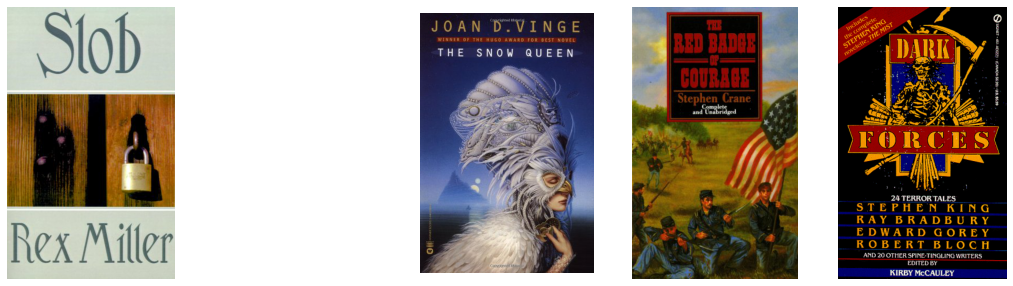

In [ ]:
title = input('Enter the Book Title: ')
category = input('Enter the category the book belongs to: ')
recommend_books(title, category)

# Content Based Filtering using Bag of Words

##### This technique does the same kind of filtering as the last one but considers more features of the book than just the summary. It takes into account the category of the book, the book author and the publisher of the book.

In [ ]:
from rake_nltk import Rake 
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
##Creating an empty column in the dataset.
df['Key_words'] = '' 

In [ ]:
##Creating a rake object.
r = Rake()

In [ ]:
df1 = df.copy()
df1 = df1.drop_duplicates(subset=['Book-Title'])

In [ ]:
##Extracting keywords using rake and adding them to the Key_words column.
for i in df1.index:
    r.extract_keywords_from_text(df1['Summary'][i])   
    key_words_dict_scores = r.get_word_degrees()    
    df1['Key_words'][i] = list(key_words_dict_scores.keys()) 

In [ ]:
##Converting these columns to lists.
df1['Category'] = df1['Category'].map(lambda x: x.split(','))
df1['Book-Author'] = df1['Book-Author'].map(lambda x: x.split(','))
df1['Publisher'] = df1['Publisher'].map(lambda x: x.split(','))

In [ ]:
##Creating a blank column for bag of words
df1['Bag_of_words'] = ''
columns = ['Category', 'Book-Author', 'Publisher', 'Key_words']

In [ ]:
##Combining 4 lists to one single column['Bag_of_words']
for i in df1.index:
    words = ''
    for col in columns:
        words += ' '.join(df1[col][i]) + ' '
    df1['Bag_of_words'][i] = words   

In [ ]:
df1['Bag_of_words'] = df1['Bag_of_words'].str.strip().str.replace('  ', ' ').str.replace('  ', ' ')
df1 = df1[['Book-Title','Bag_of_words']]

In [ ]:
df1.shape

(74115, 2)

In [ ]:
##Trimming the dataset
df1 = df1[0:25000]

In [ ]:
##Converting bag of words to vectors that can be used by macine learning algorithms.
count = CountVectorizer()
count_matrix = count.fit_transform(df1['Bag_of_words'])

In [ ]:
##Calculating cosine similarities between the bag of words for each book
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [ ]:
indices = pd.Series(df1['Book-Title'])

In [ ]:
d,n = df.shape

##This dictionary contains book titles and their image urls.
urls = {}
for i in df.index:
    urls[df['Book-Title'][i]] = df['Image-URL-L'][i]

##### This function takes in the book title and the cosine similarity matrix as the input and returns recommendations based on similarities between the bag of words for each book.

In [ ]:
def recommendbook(title, cosine_sim = cosine_sim):
    books = []
    myset = set(df1['Book-Title'])
    if title in myset:
        idx = indices[indices == title].index[0]   
        sim = pd.Series(cosine_sim[idx]).sort_values(ascending = False)   
        match = list(sim.iloc[1:6].index)   
    
        for i in match: 
            books.append(list(df1['Book-Title'])[i])
    
        myimages = []
        for key,value in urls.items():
            for book in books:
                if book == value:
                    myimages.append(key)
    
        fig, axs = plt.subplots(1, 5, figsize=(18,5))
        for i in range(5):
            mat = myimages[i]
            response = requests.get(mat);
            img = Image.open(BytesIO(response.content));
            axs[i].imshow(img);
            axs[i].axis("off");
    else:
        print('Try another book!')
                

Enter a book title: Pay Dirt (Mrs. Murphy Mysteries (Paperback))


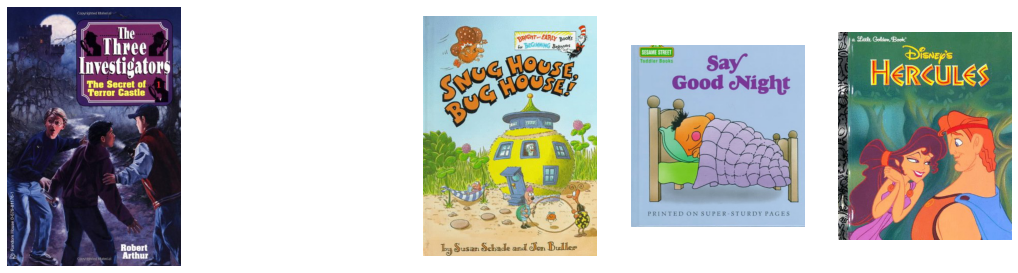

In [ ]:
name = input('Enter a book title: ')
recommendbook(name)

In [ ]:
# titles

# Collaborative Filtering based Recommendation System using kNN

In [ ]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [ ]:
##Keeping users that have rated atleast 100 books and keeping books that have atleast 100 ratings.
counts1 = df['User-ID'].value_counts()
df = df[df['User-ID'].isin(counts1[counts1 >= 100].index)]
counts = df['Book-Rating'].value_counts()
df = df[df['Book-Rating'].isin(counts[counts >= 100].index)]

In [ ]:
d,n = df.shape

##This dictionary contains isbns of the books and their corresponding image urls.
isbnrls = {}
for i in df.index:
    isbnrls[df['ISBN'][i]] = df['Image-URL-L'][i]

In [ ]:
##Creating a user-item matrix.
user_item = df.pivot(index = 'ISBN', columns = 'User-ID', values = 'Book-Rating').fillna(0)
user_item

User-ID,2276,4017,4385,6251,6543,6575,7346,8681,11676,13552,...,262998,264082,264321,265115,265889,268932,269566,270713,273113,274061
ISBN,,,,,,,,,,,,,,,,,,,,,
0684867621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
##Calculating the sparsity of the user item matrix.
non_zero = np.count_nonzero(user_item)
total_val = np.product(user_item.shape)
sparsity = (total_val - non_zero) / total_val
sparsity

0.992326235435918

In [ ]:
##Dense matrix to Sparse Matrix.
##Converting it to a csr matrix.
ui_matrix = csr_matrix(user_item)

In [ ]:
##Constructing the kNN model.
model = NearestNeighbors(n_neighbors = 10)
model.fit(ui_matrix)

NearestNeighbors(n_neighbors=10)

##### This function takes in only the book title as input and finds similar books by applying KNN on the user_item matrix. It returns the top 5 most similar books.

In [ ]:
def book_recommendation(name):
    myurls = []
    isbn = titles[name]
    if isbn in user_item.index:
        ind = np.where(user_item.index == isbn)[0][0]
        simi, matches = model.kneighbors(user_item.iloc[ind,:].values.reshape(1,-1))
        print("Finding similar books....")
        
        for i in range(len(matches)):
            if i == 0:
                print("Based on your input choice, the following books are recommended......")
            if not i:
                top_matches = list(user_item.index[matches[i]])
                for key,value in isbnrls.items():
                    for book in top_matches:
                        if book == key:
                            myurls.append(value)
   
                fig, axs = plt.subplots(1, 5, figsize=(18,5)) 
                if len(myurls) > 5:
                    for i in range(5):
                        mat = myurls[i]
                        response = requests.get(mat);
                        img = Image.open(BytesIO(response.content));
                        axs[i].imshow(img);
                        axs[i].axis("off");
                else:
                    for i in range(len(myurls)):
                        mat = myurls[i]
                        response = requests.get(mat);
                        img = Image.open(BytesIO(response.content));
                        axs[i].imshow(img);
                        axs[i].axis("off");  
    else:
        print("This book isn't avaialble in the dataset.")
        print("Try another recommendation!")     

Enter the Book Name: Notes From an Even Smaller Island
Finding similar books....
Based on your input choice, the following books are recommended......


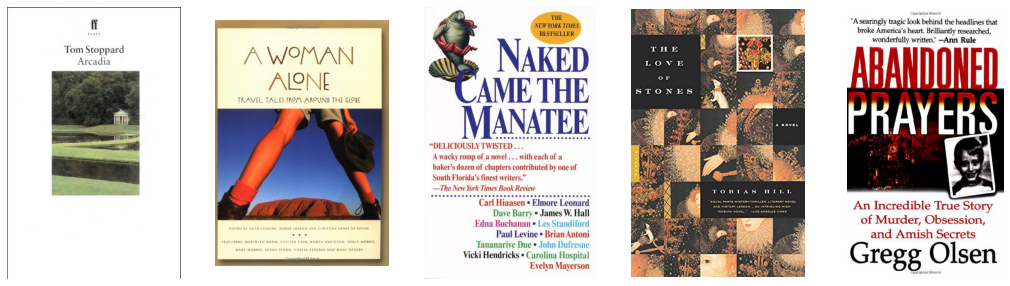

In [ ]:
name = input('Enter the Book Name: ')
book_recommendation(name)

In [ ]:
# isbnrls

# Collaborative Filtering based Recommendation System using Matrix Factorization

In [ ]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
d,n = df.shape

##This dictionary contains book titles and thier image urls.
image_urls = {}
for i in df.index:
    image_urls[df['Image-URL-L'][i]] = df['Book-Title'][i]

In [ ]:
# image_urls

##### This function takes in the book title as the input and uses truncated SVD to find similar books. It returns 5 most similar books.

In [ ]:
def svdbooks(book):
    
    user_item = df.reset_index().pivot_table(index = 'Book-Title', columns = 'User-ID', 
                                                 values = 'Book-Rating').fillna(0)
    
    item_user = user_item.T
    
    if book in user_item.index:
        SVD = TruncatedSVD(n_components=15, random_state=17)
        svddata = SVD.fit_transform(user_item)
        correlation_m = np.corrcoef(svddata)
    
        book_title = item_user.columns
        book_list = list(book_title)
        bookname = book_list.index(book)
    
        indices = correlation_m[bookname]
        matches = list(book_title[(indices > 0.9)])
        matches = matches[0:4]
   
        images = []
        n = len(matches)
        fig, axs = plt.subplots(1, 5, figsize=(18,5)) 
        for key,value in image_urls.items():
            for book in matches:
                if book == image_urls[key]:
                    images.append(key)

        if len(images) > 5:
            for i in range(5):
                mat = images[i]
                response = requests.get(mat);
                img = Image.open(BytesIO(response.content));
                axs[i].imshow(img);
                axs[i].axis("off");
        else:
            for i in range(len(images)):
                mat = images[i]
                response = requests.get(mat);
                img = Image.open(BytesIO(response.content));
                axs[i].imshow(img);
                axs[i].axis("off");
    else:
        print("This book isn't avaialble, try another book maybe")  

Enter the name of the Book: Notes From an Even Smaller Island


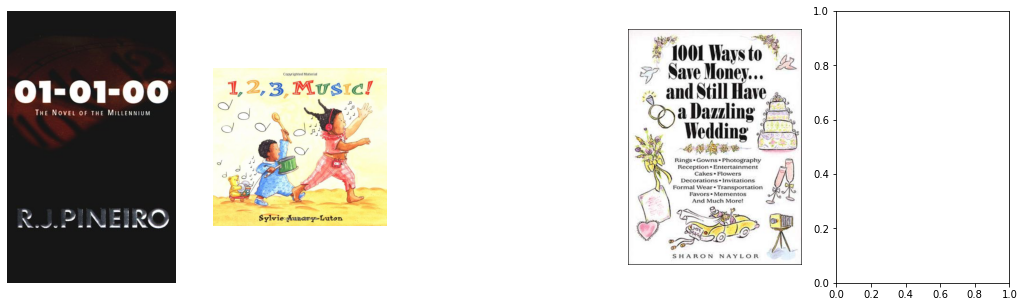

In [ ]:
name = input('Enter the name of the Book: ')
svdbooks(name)

# Recommendations using SVD (Surprise Package)

In [ ]:
from surprise import SVD
from surprise.model_selection import cross_validate
import difflib
from surprise import Dataset
from surprise import Reader

In [ ]:
dataf = df.copy()

##Defining a reader and data for the surprise algorithm.
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(dataf[['User-ID', 'ISBN','Book-Rating']], reader)

In [ ]:
svd = SVD(verbose=True, n_epochs=5)
svd_params = cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=2, verbose=True)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Evaluating RMSE, MAE of algorithm SVD on 2 split(s).

                  Fold 1  Fold 2  Mean    Std     
RMSE (testset)    1.4995  1.5088  1.5041  0.0047  
MAE (testset)     1.1260  1.1335  1.1298  0.0038  
Fit time          0.51    0.49    0.50    0.01    
Test time         0.95    0.18    0.57    0.39    


In [ ]:
d,n = dataf.shape

##This dictionary contains isbns of the books and their corresponding image urls.
isbnrls = {}
for i in dataf.index:
    isbnrls[dataf['ISBN'][i]] = dataf['Image-URL-L'][i]

In [ ]:
def recommend_using_surprise(uids, book):
    
    
    ##Setting the threshold rating to 4.
    thresh = 4
    matches = difflib.get_close_matches(book, titles)
    
    ##Getting isbns of similar books as the input.
    ids = []
    for key,value in titles.items():
        for match in matches:
            if key == match:
                ids.append(value)
    
    ##Predicting ratings the user would give the similar books.
    ratings = []          
    for i in range(len(ids)):
        rating = svd.predict(uid = uids, iid = ids[i])
        ratings.append(rating.est)
    
    ##Checking if the rating is above threshold.
    check = []
    for i in range(len(ratings)):
        if ratings[i] >= thresh:
            check.append(ids[i]) 
    
    ##Getting URLS of the books.
    images = []
    for key,value in isbnrls.items():
        for idd in check:
            if idd == key:
                images.append(value)
    n = len(images)
    
    ##Displaying the books.
    fig, axs = plt.subplots(1, n, figsize=(18,5)) 
    for i in range(n):
        mat = images[i]
        response = requests.get(mat);
        img = Image.open(BytesIO(response.content));
        axs[i].imshow(img);
        axs[i].axis("off");   

Enter your User ID: 3757
Enter a book title: The Girl Who Loved Tom Gordon : A Novel'


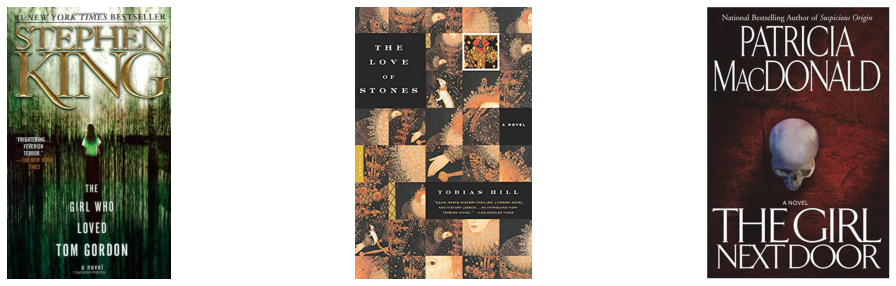

In [ ]:
uids = int(input('Enter your User ID: '))
book = input('Enter a book title: ')
recommend_using_surprise(uids, book)

In [ ]:
# titles

# Comparison of various Algorithms

In [ ]:
from surprise import *
from sklearn.model_selection import train_test_split
from surprise.model_selection import GridSearchCV
from surprise.model_selection import cross_validate

In [ ]:
df2 = df.copy()
df2 = df2[['User-ID', 'ISBN','Book-Rating','Book-Title' ,'Book-Author','Year-Of-Publication', 'Publisher']]
df2['reviews'] = df2.groupby(['ISBN'])['Book-Rating'].transform('count')
df2 = df2[['User-ID', 'ISBN','Book-Rating']]

In [ ]:
df2

,User-ID,ISBN,Book-Rating
4,4017,0060517794,10
15,135149,0060517794,7
35,11676,0684867621,3
39,23768,0684867621,6
40,25981,0684867621,10
...,...,...,...
227599,274061,1551664534,10
227600,274061,1568820461,10
227601,274061,1568821468,10
227602,274061,1569312540,10


In [ ]:
train1, test1 = train_test_split(df2, test_size=0.5,random_state=7, shuffle=True)
train2, test2 = train_test_split(df2, test_size=0.5,random_state=65, shuffle=True)
train3, test3 = train_test_split(df2, test_size=0.5,random_state=93, shuffle=True)
train4, test4 = train_test_split(df2, test_size=0.5,random_state=34, shuffle=True)
train5, test5 = train_test_split(df2, test_size=0.6,random_state=34, shuffle=True)
train6, test6 = train_test_split(df2, test_size=0.7,random_state=34, shuffle=True)
train7, test7 = train_test_split(df2, test_size=0.8,random_state=34, shuffle=True)
train8, test8 = train_test_split(df2, test_size=0.9,random_state=34, shuffle=True)

In [ ]:
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(Ratings[['User-ID', 'ISBN','Book-Rating']], reader)
data1 = Dataset.load_from_df(test1[['User-ID', 'ISBN','Book-Rating']], reader)
data2 = Dataset.load_from_df(test2[['User-ID', 'ISBN','Book-Rating']], reader)
data3 = Dataset.load_from_df(test3[['User-ID', 'ISBN','Book-Rating']], reader)
data4= Dataset.load_from_df(test4[['User-ID', 'ISBN','Book-Rating']], reader)
data5= Dataset.load_from_df(test5[['User-ID', 'ISBN','Book-Rating']], reader)
data6= Dataset.load_from_df(test6[['User-ID', 'ISBN','Book-Rating']], reader)
data7= Dataset.load_from_df(test7[['User-ID', 'ISBN','Book-Rating']], reader)
data8= Dataset.load_from_df(test8[['User-ID', 'ISBN','Book-Rating']], reader)

In [ ]:
algorithms = ['SVD','KNNWithZScore' , 'BaselineOnly' , 'CoClustering']
SVD_params = []
KNNWithZScore_params = []
Baseonly_params = []
NMF_params = []
dataset = [data1,data2,data3,data4]
count = 0

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Estimating biases using als...
Algorithm	 RMSE		 MAE

SVD 		 1.5061 	 1.1271
KNN ZScore 	 1.8188 	 1.4393
Baselineonly  	 1.5213 	 1.1607
CoClustering 	 1.9237 	 1.5217


 Random Sample  1


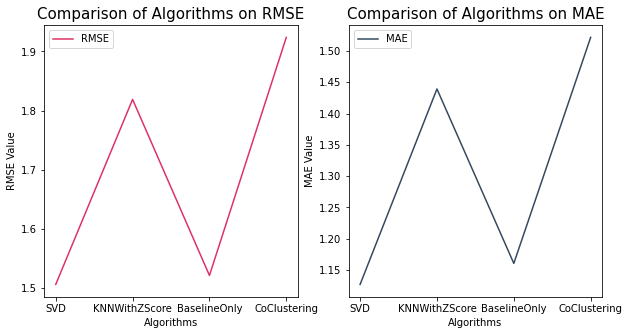

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Estimating biases using als...
Algorithm	 RMSE		 MAE

SVD 		 1.5174 	 1.1334
KNN ZScore 	 1.8216 	 1.4395
Baselineonly  	 1.5313 	 1.1692
CoClustering 	 1.9272 	 1.525


 Random Sample  2


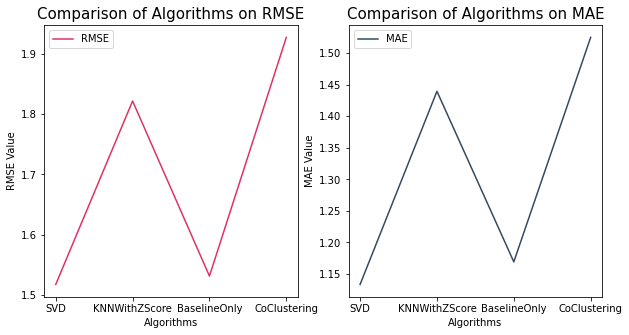

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Estimating biases using als...
Algorithm	 RMSE		 MAE

SVD 		 1.5136 	 1.1248
KNN ZScore 	 1.8148 	 1.4322
Baselineonly  	 1.5231 	 1.1584
CoClustering 	 1.9202 	 1.5153


 Random Sample  3


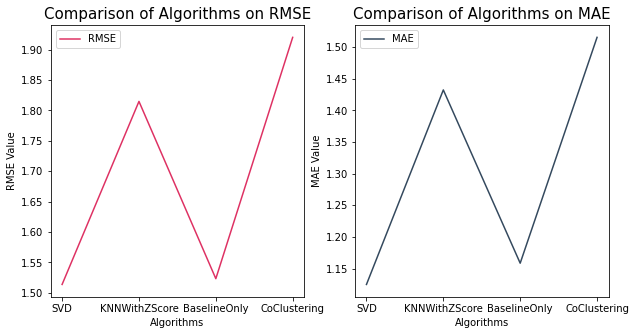

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Estimating biases using als...
Algorithm	 RMSE		 MAE

SVD 		 1.5102 	 1.1242
KNN ZScore 	 1.8129 	 1.4327
Baselineonly  	 1.5217 	 1.1584
CoClustering 	 1.9057 	 1.5082


 Random Sample  4


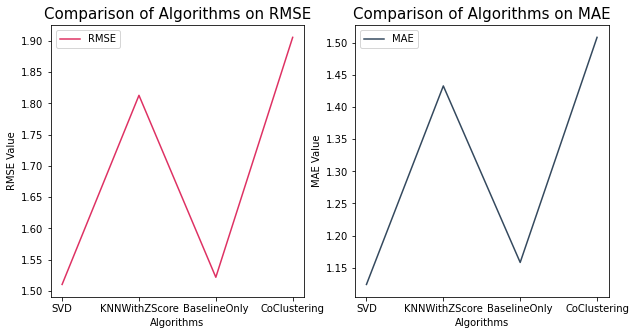

In [ ]:
for dt in dataset:
    count=count+1
    SVD_params=cross_validate(SVD(), dt, cv=2, verbose=False)  
    KNNWithZScore_params=cross_validate(KNNWithZScore(), dt, cv=2, verbose=False)
    Baseonly_params=cross_validate(BaselineOnly(), dt, cv=2, verbose=False)
    CoClustering_params=cross_validate(CoClustering(), dt, cv=2, verbose=False)
    algorithms=['SVD','KNNWithZScore' , 'Baseonly' , 'CoClustering']
    print('Algorithm\t RMSE\t\t MAE')
    print()
    print('SVD', '\t\t', round(SVD_params['test_rmse'].mean(), 4), '\t', 
          round(SVD_params['test_mae'].mean(), 4))
    print('KNN ZScore', '\t', round(KNNWithZScore_params['test_rmse'].mean(), 4), '\t', 
          round(KNNWithZScore_params['test_mae'].mean(), 4))
    print('Baselineonly ', '\t', round(Baseonly_params['test_rmse'].mean(), 4), '\t', 
          round(Baseonly_params['test_mae'].mean(), 4))
    print('CoClustering', '\t', round(CoClustering_params['test_rmse'].mean(), 4), '\t', 
          round(CoClustering_params['test_mae'].mean(), 4))
    algorithms=['SVD','KNNWithZScore' , 'BaselineOnly' , 'CoClustering']
    algo_stats=[SVD_params,KNNWithZScore_params,Baseonly_params,CoClustering_params]
    print("\n\n Random Sample ",count)
    rmse_cv = [round(i['test_rmse'].mean(), 4) for i in algo_stats]
    mae_cv = [round(i['test_mae'].mean(), 4) for i in algo_stats]

    plt.figure(figsize=(10,5))

    plt.subplot(1, 2, 1)
    plt.title('Comparison of Algorithms on RMSE', loc='center', fontsize=15)
    plt.plot(algorithms, rmse_cv, label='RMSE', color='#DE3163')
    plt.xlabel('Algorithms')
    plt.ylabel('RMSE Value')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.title('Comparison of Algorithms on MAE', loc='center', fontsize=15)
    plt.plot(algorithms, mae_cv, label='MAE', color='#34495E')
    plt.xlabel('Algorithms')
    plt.ylabel('MAE Value')
    plt.legend()

    plt.show()